In [1]:
from mdcrow import MDCrow
import os 
import mdtraj as md

In [2]:
descriptive_prompt_5 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time."
non_descriptive_prompt_5 = "Simulate 1LYZ for 1 ps at 300 K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD and radius of gyration of the simulation."

Required Tasks:
- Download
- SS Analysis
- Simulation
- RMSD
- Rgy

In [3]:
llm_model = "claude-3-opus-20240229"
tools = "all"

In [4]:
agent_1 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_5)

Thought: To answer this multi-part question, I will need to use several tools in sequence. First, I will download the PDB file for 1LYZ using the PDBFileDownloader tool.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can use the GetTurnsBetaSheetsHelices tool to get information about the number of residues in the chains and beta sheets.

Action:
```
{
  "action": "GetTurnsBetaSheetsHelices",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": "P00720"
  }
}
```

The primary accession number provided does not match any entry in the data, using the first entry instead.
The primary accession number provided does not match any entry in the data, using the first entry instead.
The primary accession number provided does not match any entry in the data, using the first entry instead.
Thought: The GetTurnsBetaSheetsHelices tool did not provide the needed information. I will

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_210150: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_210150
 1LYZ_210208: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_210220: Initial positions for simulation sim0_210220
 sim0_210220: Basic Simulation of Protein 1LYZ_210208
 rec0_210221: Simulation trajectory for protein 1LYZ_210208 and simulation sim0_210220
 rec1_210221: Simulation state log for protein 1LYZ_210208 and simulation sim0_210220
 rec2_210221: Simulation pdb frames for protein 1LYZ_210208 and simulation sim0_210220
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_210244: RMSD plot for 1LYZ
 rgy_rec0_210221: Radii of gyration per frame for rec0_210221


In [7]:
traj_path_1 = registry.get_mapped_path("rec0_210221")
top_path_1 = registry.get_mapped_path("top_sim0_210220")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)
assert os.path.exists(registry.get_mapped_path('rgy_rec0_210221'))
assert os.path.exists(registry.get_mapped_path('rmsd_1LYZ'))

In [8]:
path = registry.get_mapped_path("1LYZ_210208")
traj = md.load(path)
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  1
Number of sheets:  14
Number of helices:  50
Number of coils:  65


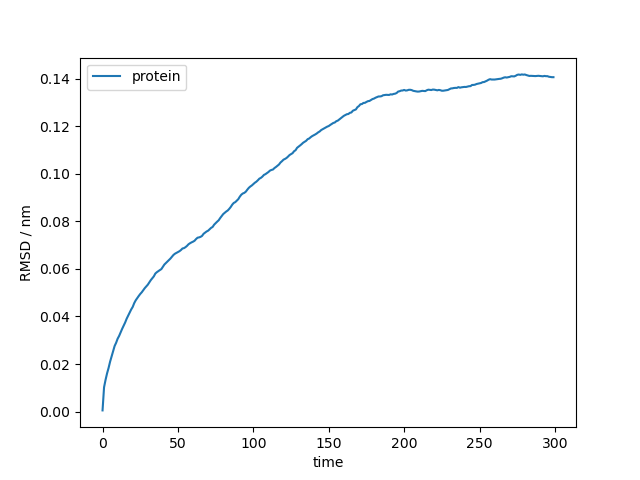

In [11]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_210244'))

In [12]:
agent_2 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_5)

Thought: To simulate 1LYZ and analyze the results, I will first need to download the PDB file. Then I can set up and run a short simulation. After that, I can analyze the secondary structure, RMSD, and radius of gyration.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can set up and run a short 1 ps simulation at 300 K using the SetUpandRunFunction tool.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_210627",
    "forcefield_files": ["amber14/protein.ff14SB.xml", "amber14/tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME", 
      "nonbondedCutoff": 1.0,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.000001,
      "ewaldErrorTolerance": 0.0005,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle", 
      "Temperature": "

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [13]:
registry = agent_2.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_210627: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_210627
 1LYZ_210653: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_210708: Initial positions for simulation sim0_210708
 sim0_210708: Basic Simulation of Protein 1LYZ_210653
 rec0_210711: Simulation trajectory for protein 1LYZ_210653 and simulation sim0_210708
 rec1_210711: Simulation state log for protein 1LYZ_210653 and simulation sim0_210708
 rec2_210711: Simulation pdb frames for protein 1LYZ_210653 and simulation sim0_210708
 rec0_211149: dssp values for trajectory with id: rec0_210711
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_211158: RMSD plot for 1LYZ


In [15]:
traj_path = registry.get_mapped_path("rec0_210711")
top_path = registry.get_mapped_path("top_sim0_210708")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(registry.get_mapped_path('rmsd_1LYZ'))

In [18]:
traj = md.load(traj_path, top=top_path)
traj = traj[-1]
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  3
Number of sheets:  14
Number of helices:  51
Number of coils:  64


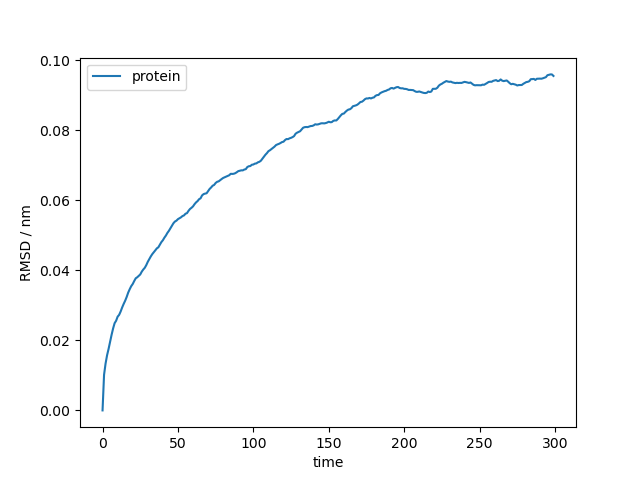

In [17]:
Image(filename=registry.get_mapped_path('fig0_211158'))